# **Model Training**

## **1. Import data and required packages**

In [61]:
# Basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

### **1.1 Import the CSV data as Pandas Dataframe**

In [62]:
df = pd.read_csv('data/stud.csv')

In [63]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## **2. Preaparing X and Y variables**

In [64]:
X = df.drop(columns=['math_score'])

In [65]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [66]:
y = df['math_score']

In [67]:
print("Categories in 'gender' column:      ", end="")
print(df['gender'].unique().tolist())

print("Categories in 'race_ethinicity' column:      ", end=" ")
print(df['race_ethnicity'].unique().tolist())

print("Categories in 'parental_level_of_education' column:      ", end=" ")
print(df['parental_level_of_education'].unique().tolist())

print("Categories in 'lunch' column:      ", end=" ")
print(df['lunch'].unique().tolist())

print("Categories in 'test_preparation_course' column:      ", end=" ")
print(df['test_preparation_course'].unique().tolist())

Categories in 'gender' column:      ['female', 'male']
Categories in 'race_ethinicity' column:       ['group B', 'group C', 'group A', 'group D', 'group E']
Categories in 'parental_level_of_education' column:       ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']
Categories in 'lunch' column:       ['standard', 'free/reduced']
Categories in 'test_preparation_course' column:       ['none', 'completed']


### **2.1 Column transformation and Standardzation**

In [68]:
num_features = X.select_dtypes(exclude='str').columns
cat_features = X.select_dtypes(include='str').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [69]:
X = preprocessor.fit_transform(X)

In [70]:
X.shape

(1000, 14)

### **2.2 Train-Test Split**

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 14), (200, 14), (800,), (200,))

## **3. Evaluating function**

In [72]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

## **4. Model Training**

In [73]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training Set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- R2 Score: {:.4f}'.format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test Set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- R2 Score: {:.4f}'.format(model_test_r2))
    print('='*35)
    r2_list.append(model_test_r2)
    
    print()

Linear Regression
Model performance for Training Set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test Set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804

Ridge Regression
Model performance for Training Set
- Root Mean Squared Error: 5.3235
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test Set
- Root Mean Squared Error: 5.3936
- Mean Absolute Error: 4.2125
- R2 Score: 0.8805

Lasso Regression
Model performance for Training Set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test Set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253

Decision Tree
Model performance for Training Set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
------------

## **5. Results**

In [74]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
1,Ridge Regression,0.880451
0,Linear Regression,0.880433
4,Random Forest,0.853473
7,AdaBoost Regressor,0.850525
6,CatBoost Regressor,0.849801
2,Lasso Regression,0.825320
5,XGBRegressor,0.825046
3,Decision Tree,0.724006


## **6. Linear Regression**

In [77]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

score = r2_score(y_test, y_pred)
print(f"Accuracy of the model is {score * 100: .2f}%")

Accuracy of the model is  88.04%


### **6.1. Plot y_pred and y_test**

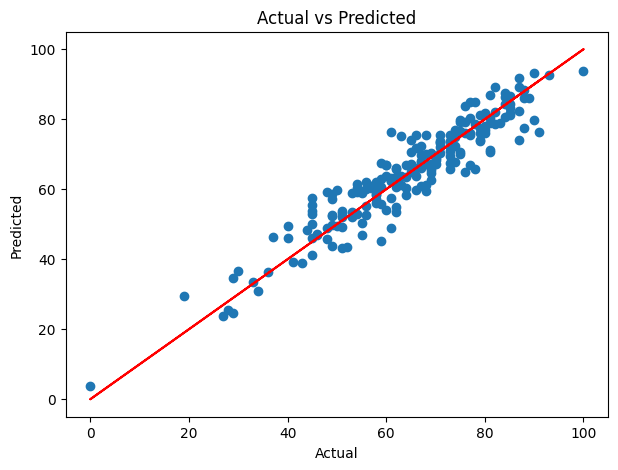

In [84]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot(y_test, y_test, color='red')
plt.show()

### **6.2 Difference between actual and predicted values**

In [85]:
pred_diff_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
pred_diff_df

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
